In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer

class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


In [ ]:
import re
from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import word_tokenize
import re

# Download the 'punkt' tokenizer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Deep Learning Project/dataset/dev.csv')



# data2 = pd.read_excel('/content/drive/MyDrive/Language_Research/Dataset/Final Dataset/Normal/2500.xlsx')

In [ ]:
import pandas as pd

df=data

# Load your DataFrame (assuming it's already loaded as df)

# Function to count sentences in a text
def count_sentences(text):
    return len([s for s in text.split('।') if s.strip()])  # Splitting by Bengali danda

# Apply function to count sentences
df['sentence_count'] = df['text'].apply(count_sentences)

# Compute statistics
max_sentences = df['sentence_count'].max()
min_sentences = df['sentence_count'].min()
avg_sentences = df['sentence_count'].mean()

total_sentences = df['sentence_count'].sum()
print(f"Total sentences in the DataFrame: {total_sentences}")


print(f"Max sentences: {max_sentences}")
print(f"Min sentences: {min_sentences}")
print(f"Avg sentences: {avg_sentences:.2f}")


Total sentences in the DataFrame: 2004
Max sentences: 11
Min sentences: 1
Avg sentences: 1.51


In [ ]:

print("Total Contents:",len(data),
      "\nTotal Non-Violence Contents:",len(data[data.label ==0]),
      "\nTotal Passive Violence Contents:",len(data[data.label==1]),
      "\nTotal Direct Violence Contents:",len(data[data.label ==2]))

Total Contents: 1330 
Total Non-Violence Contents: 717 
Total Passive Violence Contents: 417 
Total Direct Violence Contents: 196


In [ ]:
# print some unprocessed reviews

print("Some Unprocessed Reviews")
print("\n")

sample_data = [ 150, 155,  12]
for i in sample_data:
      print(data.text[i],'\n','Language:-- ',data.label[i],'\n')

Some Unprocessed Reviews


কি সুন্দর একটি নাম হযরত মোহাম্মদ সাঃ লাইক হবে,,,❤❤❤ ।।। 
 Language:--  0 

যারা আজকে মত প্রকাশের অধিকারের কথা বলছে তবে যদি মত প্রকাশের স্বাধীনতার সবার থাকে তবে আলেমদের কেন মন খুলে কথা বলতে দেওয়া হয় না । আর আজকে যদি দেশের উচ্চ পদের কোনো ব্যক্তির ব্যাপারে কথা বলা হয় তবে তো তারা ঠিকি তার সাজা দেয় । তখন কোথায় থাকে মত প্রকাশের স্বাধীনতা । যখন কেউ ইসলাম নিয়ে কথা বলে তখনি যত মত প্রকাশের স্বাধীনতা । হায়রে বিধান । সময় একদিন আমাদেরও আসবে । তখন দেখা যাবে । .............? 
 Language:--  2 

একটা কুকুরকে মেরেছে তার জন্য ফাসি আর সিনহার বিচার হয়না। 
 Language:--  1 



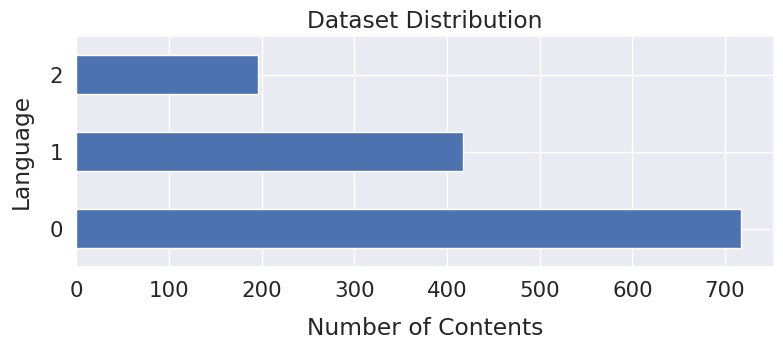

In [ ]:
data['category'] = data['label']
data['content'] = data['text']
sns.set(font_scale=1.4)
data['category'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Contents", labelpad=12)
plt.ylabel("Language", labelpad=12)
plt.yticks(rotation = 0)
plt.title("Dataset Distribution", y=1);

In [ ]:
import pandas as pd


# Assume 'class_label' is the column containing class labels
class_labels = data['category']

# Calculate class distribution
class_distribution = class_labels.value_counts()
print(class_distribution)


category
0    717
1    417
2    196
Name: count, dtype: int64


<ipython-input-79-85ad6a237a45>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


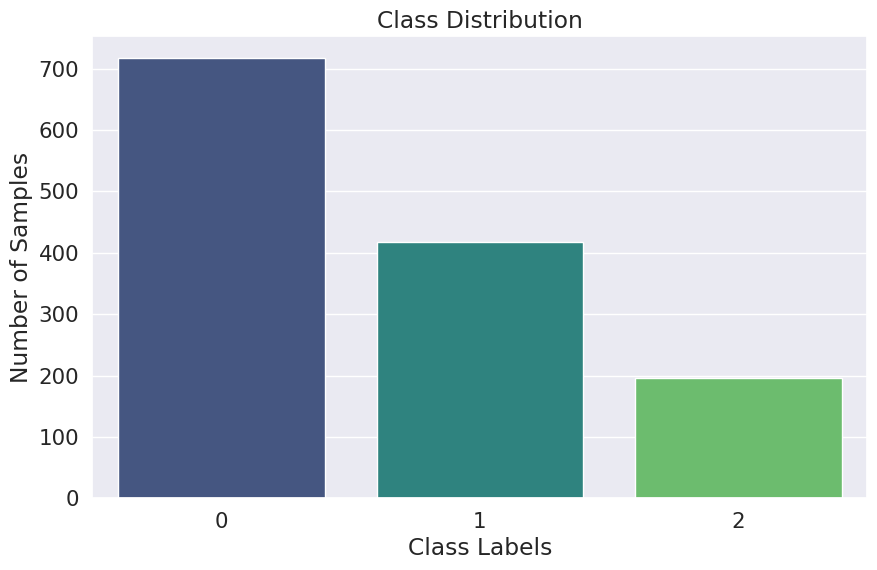

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()


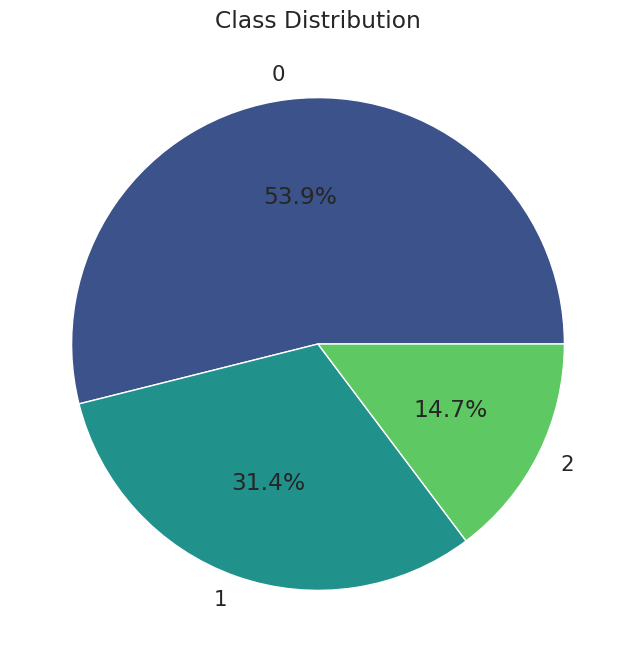

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(class_distribution)))
plt.title('Class Distribution')
plt.show()


<ipython-input-81-ab4cb8165503>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=class_distribution.index, x=class_distribution.values, palette='viridis')


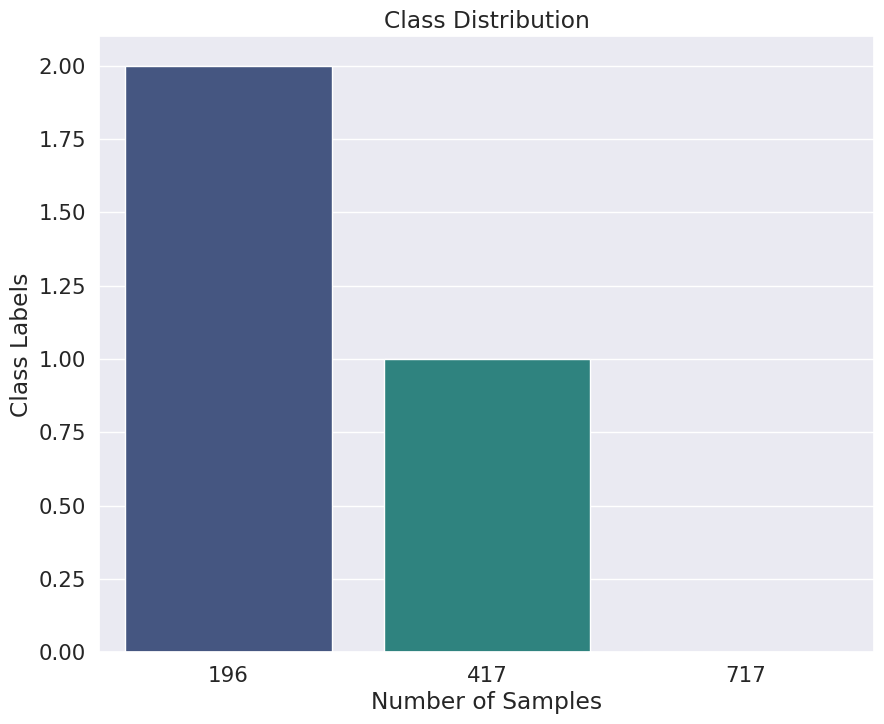

In [ ]:

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(y=class_distribution.index, x=class_distribution.values, palette='viridis')
plt.ylabel('Class Labels')
plt.xlabel('Number of Samples')
plt.title('Class Distribution')
plt.show()


## **Data Cleaning**

In [ ]:
# import re

# # Data cleaning function
# def process_content(content):
#     content = re.sub('[^\w\s\u0980-\u09FF\u09E6-\u09EF]', ' ', str(content))  # Removing unnecessary punctuation
#     content = content.strip()  # Removing leading/trailing spaces
#     return content



import re

# Data cleaning function
def process_content(content):
    # Remove everything except Bengali script characters and spaces
    content = re.sub('[^\u0980-\u09FF\s]', '', str(content))  # Remove non-Bengali characters
    # Remove Bengali numerals (০-৯)
    content = re.sub('[\u09E6-\u09EF]', '', content)  # Remove Bengali numerals
    content = content.strip()  # Remove leading/trailing spaces
    return content

In [ ]:
data

,text,label,sentence_count,category,content
0,পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শ...,0,1,0,পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শ...
1,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,0,1,0,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...
2,সঠিক তদন্ত করতে হবে। বিচারের আওতায় আনতে হবে য...,0,2,0,সঠিক তদন্ত করতে হবে। বিচারের আওতায় আনতে হবে য...
3,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,0,1,0,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...
4,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,1,2,1,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...
...,...,...,...,...,...
1325,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...,1,1,1,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...
1326,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...,1,1,1,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...
1327,জে ছেলে মারা গেছে ওর কি হবে,0,1,0,জে ছেলে মারা গেছে ওর কি হবে
1328,এরাই নৈরাজ্য সৃষ্টি করছে,1,1,1,এরাই নৈরাজ্য সৃষ্টি করছে


In [ ]:
# Apply the function into the dataframe
data['cleaned'] = data['content'].apply(process_content)

# print some cleaned reviews from the dataset
sample_data = [150, 250,  500]
for i in sample_data:
     print('Original:\n',data.content[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Category:-- ',data.category[i],'\n')

Original:
 কি সুন্দর একটি নাম হযরত মোহাম্মদ সাঃ লাইক হবে,,,❤❤❤ ।।। 
Cleaned:
 কি সুন্দর একটি নাম হযরত মোহাম্মদ সাঃ লাইক হবে 
 Category:--  0 

Original:
 প্রশাসনের কাছে একটাই অনুরোধ এটা সঠিক তদন্ত করুক এই ছবিটা প্রথম ছেড়েছে অনলাইনে বা কে লাইভ এসেছে প্রথম তাকে আইনের আওতায় আনা হোক 
Cleaned:
 প্রশাসনের কাছে একটাই অনুরোধ এটা সঠিক তদন্ত করুক এই ছবিটা প্রথম ছেড়েছে অনলাইনে বা কে লাইভ এসেছে প্রথম তাকে আইনের আওতায় আনা হোক 
 Category:--  0 

Original:
 ওদের লেংটা হওয়ার স্বাধীনতা আছে কিন্তু বাকীদের গোমটা দেওয়ার স্বাধীনতা নেই। 
Cleaned:
 ওদের লেংটা হওয়ার স্বাধীনতা আছে কিন্তু বাকীদের গোমটা দেওয়ার স্বাধীনতা নেই 
 Category:--  1 



In [ ]:
data

,text,label,sentence_count,category,content,cleaned
0,পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শ...,0,1,0,পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শ...,পাডা পুতার মাঝখানে পরে সাধারণ মানুষের জিবন শে...
1,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,0,1,0,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...
2,সঠিক তদন্ত করতে হবে। বিচারের আওতায় আনতে হবে য...,0,2,0,সঠিক তদন্ত করতে হবে। বিচারের আওতায় আনতে হবে য...,সঠিক তদন্ত করতে হবে বিচারের আওতায় আনতে হবে যে...
3,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,0,1,0,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...
4,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,1,2,1,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...
...,...,...,...,...,...,...
1325,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...,1,1,1,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...
1326,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...,1,1,1,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...
1327,জে ছেলে মারা গেছে ওর কি হবে,0,1,0,জে ছেলে মারা গেছে ওর কি হবে,জে ছেলে মারা গেছে ওর কি হবে
1328,এরাই নৈরাজ্য সৃষ্টি করছে,1,1,1,এরাই নৈরাজ্য সৃষ্টি করছে,এরাই নৈরাজ্য সৃষ্টি করছে


In [ ]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))




# Remove the reviews with least words
dataset = data.loc[(data.length > 0) & (data.length < 1500)]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small contents".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))


After Cleaning: 
Removed 0 Small contents 
Total Reviews: 1330


In [ ]:
dataset

,text,label,sentence_count,category,content,cleaned,length
0,পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শ...,0,1,0,পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শ...,পাডা পুতার মাঝখানে পরে সাধারণ মানুষের জিবন শে...,15
1,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,0,1,0,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,16
2,সঠিক তদন্ত করতে হবে। বিচারের আওতায় আনতে হবে য...,0,2,0,সঠিক তদন্ত করতে হবে। বিচারের আওতায় আনতে হবে য...,সঠিক তদন্ত করতে হবে বিচারের আওতায় আনতে হবে যে...,13
3,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,0,1,0,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,14
4,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,1,2,1,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,61
...,...,...,...,...,...,...,...
1325,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...,1,1,1,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...,10
1326,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...,1,1,1,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...,27
1327,জে ছেলে মারা গেছে ওর কি হবে,0,1,0,জে ছেলে মারা গেছে ওর কি হবে,জে ছেলে মারা গেছে ওর কি হবে,7
1328,এরাই নৈরাজ্য সৃষ্টি করছে,1,1,1,এরাই নৈরাজ্য সৃষ্টি করছে,এরাই নৈরাজ্য সৃষ্টি করছে,4


In [ ]:
# Assume 'class_label' is the column containing class labels
class_labels = dataset['category']

# Calculate class distribution
class_distribution = class_labels.value_counts()
print(class_distribution)

category
0    717
1    417
2    196
Name: count, dtype: int64


In [ ]:
def data_summary(dataset):

    """
    This function will print the summary of the reviews and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.category.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.category==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.category==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.category==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)



Class Name :  0
Number of Documents:717
Number of Words:10943
Number of Unique Words:3576
Most Frequent Words:

না	185
বিচার	120
করে	119
কি	111
এই	102
ভাই	84
হবে	81
কে	73
আর	70
আল্লাহ	67

Class Name :  1
Number of Documents:417
Number of Words:7161
Number of Unique Words:2730
Most Frequent Words:

না	113
করে	79
এই	78
কি	62
দালাল	58
আর	56
তো	39
বিচার	37
জন্য	36
হবে	36

Class Name :  2
Number of Documents:196
Number of Words:3458
Number of Unique Words:1539
Most Frequent Words:

করে	55
হবে	53
না	50
এই	38
বন্ধ	36
কে	30
করা	30
আল্লাহ	28
হোক	27
ইসলাম	27
Total Number of Unique Words:5794


<ipython-input-90-099026cc9f6c>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(class_names, rotation=0);


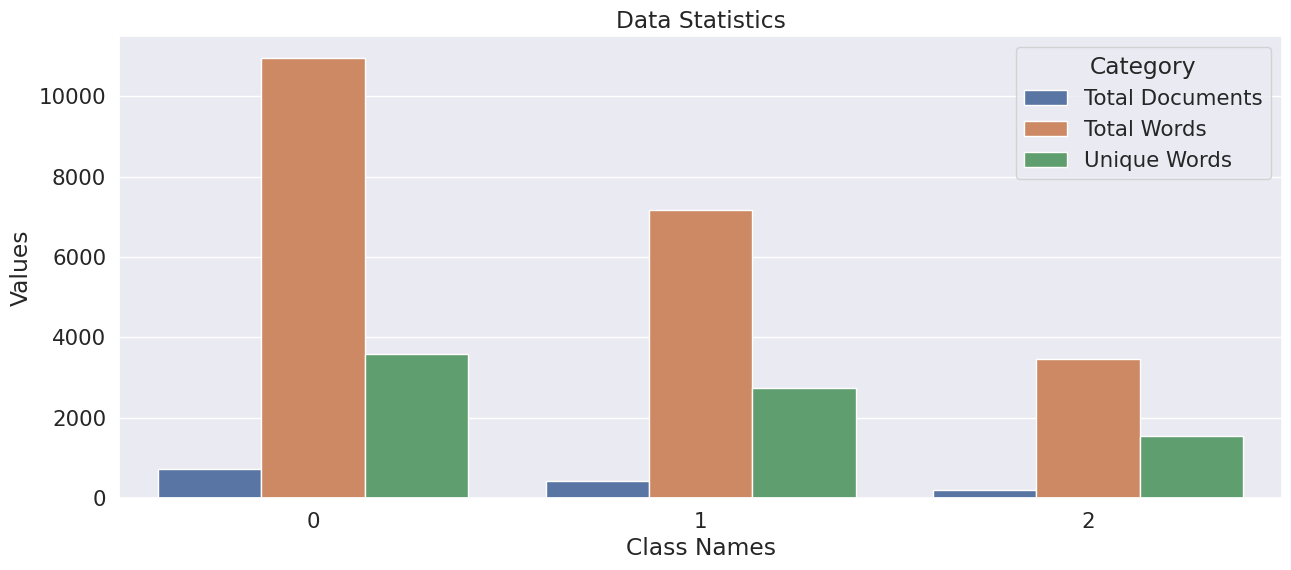

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(15, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=0);

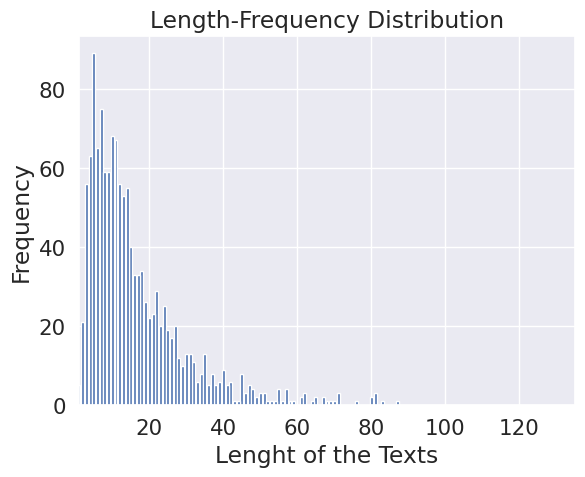

Maximum Length of a review: 87
Minimum Length of a review: 1
Average Length of a reviews: 16.0


In [ ]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

In [ ]:
Assamese = dataset[dataset.category == 'Assamese']
Bangla = dataset[dataset.category == 'Bangla']
Chittagonian = dataset[dataset.category == 'Chittagonian']
Chakma = dataset[dataset.category == 'Chakma']
Kokborok = dataset[dataset.category == 'Kokborok']

dataset.category.value_counts()

,count
category,
0,717
1,417
2,196


In [ ]:
dataset

,text,label,sentence_count,category,content,cleaned,length,ReviewLength
0,পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শ...,0,1,0,পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শ...,পাডা পুতার মাঝখানে পরে সাধারণ মানুষের জিবন শে...,15,15
1,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,0,1,0,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,16,16
2,সঠিক তদন্ত করতে হবে। বিচারের আওতায় আনতে হবে য...,0,2,0,সঠিক তদন্ত করতে হবে। বিচারের আওতায় আনতে হবে য...,সঠিক তদন্ত করতে হবে বিচারের আওতায় আনতে হবে যে...,13,13
3,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,0,1,0,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,14,14
4,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,1,2,1,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,61,61
...,...,...,...,...,...,...,...,...
1325,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...,1,1,1,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...,10,10
1326,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...,1,1,1,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...,27,27
1327,জে ছেলে মারা গেছে ওর কি হবে,0,1,0,জে ছেলে মারা গেছে ওর কি হবে,জে ছেলে মারা গেছে ওর কি হবে,7,7
1328,এরাই নৈরাজ্য সৃষ্টি করছে,1,1,1,এরাই নৈরাজ্য সৃষ্টি করছে,এরাই নৈরাজ্য সৃষ্টি করছে,4,4


In [ ]:
data = dataset.drop(columns=['content', 'ReviewLength'])

In [ ]:
data.rename(columns={'cleaned': 'content'}, inplace=True)
data

,text,label,sentence_count,category,content,length
0,পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শ...,0,1,0,পাডা পুতার মাঝখানে পরে সাধারণ মানুষের জিবন শে...,15
1,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,0,1,0,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,16
2,সঠিক তদন্ত করতে হবে। বিচারের আওতায় আনতে হবে য...,0,2,0,সঠিক তদন্ত করতে হবে বিচারের আওতায় আনতে হবে যে...,13
3,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,0,1,0,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,14
4,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,1,2,1,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,61
...,...,...,...,...,...,...
1325,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...,1,1,1,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...,10
1326,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...,1,1,1,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...,27
1327,জে ছেলে মারা গেছে ওর কি হবে,0,1,0,জে ছেলে মারা গেছে ওর কি হবে,7
1328,এরাই নৈরাজ্য সৃষ্টি করছে,1,1,1,এরাই নৈরাজ্য সৃষ্টি করছে,4


In [ ]:
data = data[['content', 'label']]


In [ ]:
data.to_excel('dev.xlsx', index=False)

In [ ]:
data['content'][1463]

'হ চুদাইয়া সব শেষে চুদাইতে সব দোষ পুলিশের ই হয়সব মাদারচোদেরাবাপ মায় শিক্ষার জন্য পাঠাইছেহইতাছে সব বখাটেতার পরেও ব্যবসায়ীদের ব্যবহার অনেক খারাপ এটারো ব্যবস্থা নেওয়া উচিৎএখনের মতো পুলিশ না আসাই উত্তমতোমরা তোমরা চুদাচুদি করে যা খুশি করতে থাকো'

In [ ]:

# Extract the texts and labels
texts = data['content'].values
labels = data['category'].values

In [ ]:
def preprocess_text(text):
    # Convert the input to a string (if it's not already) and handle NaN values
    if isinstance(text, float):
        return ""  # Return an empty string for NaN values or floats
    # Convert to lowercase, remove punctuation, etc.
    text = re.sub(r'[^\w\s\u0980-\u09FF]', '', text)
    return word_tokenize(text)

# # Apply preprocessing
# texts = [preprocess_text(text) for text in texts]

In [ ]:
import nltk
nltk.download('punkt_tab')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


reviews_lines1=list()
lines= data['content'].values.tolist()

for line in lines:
  tokens=word_tokenize(line)

  reviews_lines1.append(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
reviews_lines1

[['যে',
  'দেশে',
  'সন্ত্রাসরা',
  'দেশ',
  'চালায়সে',
  'দেশে',
  'শান্তি',
  'কিভাবে',
  'আশা',
  'করবেন'],
 ['এই',
  'বিচার',
  'শেষ',
  'বিচার',
  'নয়আসল',
  'বিচার',
  'হবে',
  'আল্লাহর',
  'আদালতে',
  'সেইদিন',
  'সকল',
  'জালেমের',
  'মুখোস',
  'উন্মোচন',
  'হবে'],
 ['আরব',
  'দেশগুলোকে',
  'বলব',
  'ভারতের',
  'সাথে',
  'সব',
  'ব্যবসা',
  'বাণিজ্য',
  'বন্ধ',
  'করে',
  'দেন',
  'যারা',
  'হিন্দু',
  'ব্যবসায়ী',
  'আছে',
  'তাদের',
  'সাথে',
  'সব',
  'বন্ধ',
  'করে',
  'দেয়া',
  'উচিত'],
 ['দেশটা', 'সুস্থ', 'নাই'],
 ['আপনার',
  'কথা',
  'দুঃখ',
  'জনক',
  'আগে',
  'বিডিও',
  'থাকলে',
  'কেন',
  'ধরা',
  'হলনা',
  'হিন্দু',
  'দের',
  'খতি',
  'হোতনা',
  'ধন্যবাদ',
  'আপনাকে'],
 ['সত্যি',
  'এটা',
  'মুসলিম',
  'করেছে',
  'জেনে',
  'হিন্দু',
  'সম্প্রদায়ের',
  'ভাই',
  'বোন',
  'দের',
  'কাছে',
  'দূঃখ',
  'ও',
  'সহমর্মিতা',
  'অনুভব',
  'করছি'],
 ['একজন',
  'বাবা',
  'কতোটা',
  'অসহায়',
  'হলে',
  'এই',
  'কথা',
  'বলতে',
  'পারে',
  'আল্লাহ',
  'তুমি',
  'বিচার',
  'করো'

In [ ]:
len(reviews_lines1)

2700

In [ ]:
# import gensim
# EMBEDDING_DIM=100
# model=gensim.models.Word2Vec(sentences=reviews_lines1,\
#                              vector_size=EMBEDDING_DIM, window=5,min_count=2)


In [ ]:
# import gensim

# # Define embedding dimension
# EMBEDDING_DIM = 200

# from gensim.models import Word2Vec
# model = Word2Vec(reviews_lines1, vector_size=200, window=3, min_count=2, workers=4, sg=0)





In [ ]:
import gensim

# Define embedding dimension
EMBEDDING_DIM = 200

from gensim.models import FastText

# Assuming reviews_lines1 is your preprocessed text data (list of tokenized sentences)
model = FastText(sentences=reviews_lines1, vector_size=EMBEDDING_DIM, window=3, min_count=2, workers=4, sg=1)



In [ ]:
words = list(model.wv.index_to_key)


In [ ]:
len(words)

3466

In [ ]:
model.wv.most_similar("সন্ত্রাস")

[('সন্ত্রাসী', 0.9999974966049194),
 ('ষড়যন্ত্র', 0.9999885559082031),
 ('ষড়যন্ত্র', 0.9999873638153076),
 ('গণতন্ত্র', 0.9999855756759644),
 ('অস্ত্র', 0.9999855756759644),
 ('গনতন্ত্র', 0.9999844431877136),
 ('স্ত্রী', 0.9999837875366211),
 ('মন্ত্রী', 0.9999833703041077),
 ('প্রধানমন্ত্রীকে', 0.9999827742576599),
 ('প্রধানমন্ত্রী', 0.9999823570251465)]

In [ ]:
similarity_score = model.wv.similarity("সন্ত্রাস", "ছাত্র")
print(similarity_score)


0.9995872


In [ ]:
# print(f"Words: ইস্কুল, স্কুল - Similarity Score: {model.wv.similarity('ইস্কুল', 'স্কুল')}")
# print(f"Words: কবি, কবিতা - Similarity Score: {model.wv.similarity('কবি', 'কবিতা')}")
# print(f"Words: রাজা, রাণী - Similarity Score: {model.wv.similarity('রাজা', 'রাণী')}")
# # print(f"Words: প্রেক্ষাপট, পরিপ্রেক্ষিত - Similarity Score: {model.wv.similarity('প্রেক্ষাপট', 'পরিপ্রেক্ষিত')}")
# print(f"Words: আলো, অন্ধকার - Similarity Score: {model.wv.similarity('আলো', 'অন্ধকার')}")
# print(f"Words: জীবনে, জীবনত - Similarity Score: {model.wv.similarity('জীবনে', 'জীবনত')}")



In [ ]:
filename = '/content/drive/MyDrive/Deep Learning Project/Embedding_models/FastText_SkipGram.txt'
model.wv.save_word2vec_format(filename, binary=False)

In [ ]:
import os
embedding_index={}

f = open('novel_embedding_word2vec.txt',encoding='utf-8')
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:])
  embedding_index[word]=coefs

f.close()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Initialize the label encoder
label_encoder = LabelEncoder()

# Convert string labels (e.g., 'A', 'B', etc.) to integers
encoded_labels = label_encoder.fit_transform(labels)

# Now convert the integer labels to one-hot encoding
y = to_categorical(encoded_labels, num_classes=5)  # Assuming 5 classes

# Check if the labels have been correctly transformed
print(f"Encoded labels: {encoded_labels}")
print(f"One-hot encoded labels shape: {y.shape}")

Encoded labels: [0 0 0 ... 4 4 4]
One-hot encoded labels shape: (5303, 5)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Initialize the Tokenizer
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(reviews_lines1)

# Convert texts to sequences of integers
sequences = tokenizer_obj.texts_to_sequences(reviews_lines1)

# Define maximum length for padding
max_length = 200

word_index=tokenizer_obj.word_index

# Pad sequences to ensure uniform input size
review_pad = pad_sequences(sequences, maxlen=max_length, padding='post')

# Prepare sentiment labels
sentiment = y

# Print the shape of the padded sequences and sentiment labels
print("Padded reviews shape:", review_pad.shape)
print("Sentiment shape:", sentiment.shape)

# Shuffle the dataset
indices = np.arange(review_pad.shape[0])
np.random.shuffle(indices)

# Apply the shuffle to the data
review_pad = review_pad[indices]
sentiment = sentiment[indices]

# Now review_pad and sentiment can be used directly for training
X_train_pad = review_pad
y_train = sentiment

print("Training reviews shape:", X_train_pad.shape)
print("Training sentiment shape:", y_train.shape)


Padded reviews shape: (5303, 200)
Sentiment shape: (5303, 5)
Training reviews shape: (5303, 200)
Training sentiment shape: (5303, 5)


In [ ]:
# TEST_SPLIT=0.20
# num_test_samples = int(TEST_SPLIT*X_train_pad.shape[0])



# X_train_pad=X_train_pad[num_test_samples:]
# y_train= y_train[num_test_samples:]

# x_test_pad= X_train_pad[:num_test_samples]
# y_test= y_train[:num_test_samples]


In [ ]:
# Step 2: Perform a stratified split for train, validation, and test sets
# First, split into train+val and test (80% train+val, 20% test)
X_train_pad, X_test_pad, y_train, y_test = train_test_split(
    review_pad, sentiment, test_size=0.15, stratify=sentiment, random_state=42
)

# Then split train+val into train and validation (75% train, 25% validation)
X_train_pad, X_val_pad, y_train, y_val = train_test_split(
    X_train_pad, y_train, test_size=0.20, stratify=y_train, random_state=42
)

# Output the shapes of the data to check the splits
print("Train data shape:", X_train_pad.shape, y_train.shape)
print("Validation data shape:", X_val_pad.shape, y_val.shape)
print("Test data shape:", X_test_pad.shape, y_test.shape)

Train data shape: (3605, 200) (3605, 5)
Validation data shape: (902, 200) (902, 5)
Test data shape: (796, 200) (796, 5)


In [ ]:
print(X_train_pad.shape)
print(y_train.shape)
print(X_val_pad.shape)
print(y_val.shape)
print(X_test_pad.shape)
print(y_test.shape)

(3605, 200)
(3605, 5)
(902, 200)
(902, 5)
(796, 200)
(796, 5)


In [ ]:
y_test

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
EMBEDDING_DIM=100
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,EMBEDDING_DIM))

for word, i in word_index.items():
  if i>num_words:
    continue
  embedding_vector=embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

In [ ]:
num_words

83499

In [ ]:
EMBEDDING_DIM

100

In [ ]:
max_length

200

In [ ]:
X_train_pad[5]

array([ 3655, 63419,   557, 63420,  1350, 12331,     1, 13464, 63421,
          11, 31412,     1,    51,     3, 31412,    53,  1631,  3103,
           5,  4038,   679,  7735, 31413,  1582,    13, 31414,  1582,
       63422, 63423,    13,  1631,  1573, 20020,  2239, 21415,  1010,
        1260,    39, 11382,    13, 63424,   613,   476, 11403,  1010,
        1260,     1, 63425,  1582, 63426,   150, 31415, 63427, 31415,
       20593,  2819, 31416, 63428, 63429,  1893,  1544,  2467,  4991,
       31416, 31417,    18,   130,   282,   352, 63430,    18, 31196,
        2962,   352,  2016,  9854,  1894,  2317,  1350, 63431,   761,
        1543,  1287, 63432, 16194, 63433,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1795584 , -0.24765654,  0.69096035, ..., -0.5545504 ,
         0.18756187,  0.31336263],
       [-0.37143305, -0.7877172 ,  1.1230636 , ..., -1.135421  ,
         0.85005236,  0.35593075],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# **DPCNN**

In [ ]:
# from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Conv1D, BatchNormalization, ReLU, add, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras import optimizers

# # Parameters
# filter_nr = 250  # DPCNN typically uses 250 filters
# filter_size = 3
# max_pool_size = 3
# max_pool_strides = 2
# dense_nr = 256
# spatial_dropout = 0.2
# dense_dropout = 0.5
# train_embed = False
# num_classes = 5  # Number of classes for classification

# # Input and Embedding layer
# inputs = Input(shape=(max_length,))
# embedding = Embedding(num_words, EMBEDDING_DIM, weights=[embedding_matrix], trainable=train_embed)(inputs)
# embedding = SpatialDropout1D(spatial_dropout)(embedding)

# block0 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(embedding)
# block0 = BatchNormalization()(block0)
# block0 = ReLU()(block0)


# # Block 1
# block1 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block0)
# block1 = BatchNormalization()(block1)
# block1 = ReLU()(block1)
# block1 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block1)
# block1 = BatchNormalization()(block1)
# block1 = ReLU()(block1)

# # Resize embedding to match the shape of the convolutional block for skip connection
# resize_emb = Conv1D(filter_nr, kernel_size=1, padding='same', activation='linear')(embedding)
# resize_emb = ReLU()(resize_emb)

# block1_output = add([block1, resize_emb])  # Skip connection
# block1_output = MaxPooling1D(pool_size=max_pool_size, strides=max_pool_strides)(block1_output)

# # Block 2
# block2 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block1_output)
# block2 = BatchNormalization()(block2)
# block2 = ReLU()(block2)
# block2 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block2)
# block2 = BatchNormalization()(block2)
# block2 = ReLU()(block2)

# block2_output = add([block2, block1_output])  # Skip connection
# block2_output = MaxPooling1D(pool_size=max_pool_size, strides=max_pool_strides)(block2_output)

# # Block 3
# block3 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block2_output)
# block3 = BatchNormalization()(block3)
# block3 = ReLU()(block3)
# block3 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block3)
# block3 = BatchNormalization()(block3)
# block3 = ReLU()(block3)

# block3_output = add([block3, block2_output])  # Skip connection
# block3_output = MaxPooling1D(pool_size=max_pool_size, strides=max_pool_strides)(block3_output)

# # Block 4
# block4 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block3_output)
# block4 = BatchNormalization()(block4)
# block4 = ReLU()(block4)
# block4 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation='linear')(block4)
# block4 = BatchNormalization()(block4)
# block4 = ReLU()(block4)

# block4_output = add([block4, block3_output])  # Skip connection
# block4_output = MaxPooling1D(pool_size=max_pool_size, strides=max_pool_strides)(block4_output)

# # Global Max Pooling
# output = GlobalMaxPooling1D()(block4_output)

# # Dense Layer with Dropout
# output = Dense(dense_nr, activation='linear')(output)
# output = BatchNormalization()(output)
# output = ReLU()(output)
# output = Dropout(dense_dropout)(output)

# # Final output layer for multi-class classification (softmax)
# output = Dense(num_classes, activation='softmax')(output)

# # Model definition
# model = Model(inputs, output)
# print(model.summary())

# # Compile model
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.Adam(),
#               metrics=['accuracy'])


# # # # Optionally, visualize the model architecture
# # plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
# from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Conv1D, ReLU, add, GlobalAveragePooling1D, Dense, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras import optimizers

# # Parameters
# filter_nr = 128  # Reduced filters to 128
# filter_size = 3
# dense_nr = 128  # Smaller dense layer
# spatial_dropout = 0.2
# dense_dropout = 0.5
# num_classes = 5  # Number of classes for classification
# activation = 'linear'

# # Input and Embedding layer
# inputs = Input(shape=(max_length,))
# # Add embedding layer
# embedding = Embedding(input_dim=num_words,
#                             output_dim=EMBEDDING_DIM,
#                             embeddings_initializer=Constant(embedding_matrix),
#                             input_length=max_length,
#                             trainable=False)(input)  # Apply the input tensor here

# embedding = SpatialDropout1D(spatial_dropout)(embedding)

# block0 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation=activation)(embedding)
# block0 = ReLU()(block0)

# # Block 1
# block1 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation=activation)(block0)
# block1 = ReLU()(block1)
# block1 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation=activation)(block1)
# block1 = ReLU()(block1)

# # Resize embedding to match the shape of the convolutional block for skip connection
# resize_emb = Conv1D(filter_nr, kernel_size=1, padding='same', activation=activation)(embedding)
# resize_emb = ReLU()(resize_emb)

# block1_output = add([block1, resize_emb])  # Skip connection

# # Block 2
# block2 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation=activation)(block1_output)
# block2 = ReLU()(block2)
# block2 = Conv1D(filter_nr, kernel_size=filter_size, padding='same', activation=activation)(block2)
# block2 = ReLU()(block2)

# block2_output = add([block2, block1_output])  # Skip connection

# # Global Average Pooling
# output = GlobalAveragePooling1D()(block2_output)

# # Dense Layer with Dropout
# output = Dense(dense_nr, activation=activation)(output)
# output = ReLU()(output)
# output = Dropout(dense_dropout)(output)

# # Final output layer for multi-class classification (softmax)
# output = Dense(num_classes, activation='softmax')(output)

# # Model definition
# model = Model(inputs, output)
# print(model.summary())

# # Compile model
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.Adam(),
#               metrics=['accuracy'])


In [ ]:
pip install keras_tuner

In [ ]:
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Conv1D, ReLU, add, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt



# Define the model builder function
def build_model(hp):
    # Hyperparameters to tune
    filter_nr = hp.Int('filter_nr', min_value=64, max_value=256, step=32)  # Number of filters
    filter_size = hp.Int('filter_size', min_value=2, max_value=5, step=1)  # Kernel size
    dense_nr = hp.Int('dense_nr', min_value=64, max_value=256, step=32)    # Dense layer size
    spatial_dropout = hp.Float('spatial_dropout', min_value=0.1, max_value=0.5, step=0.1)
    dense_dropout = hp.Float('dense_dropout', min_value=0.1, max_value=0.5, step=0.1)
    num_blocks = hp.Int('num_blocks', min_value=1, max_value=5, step=1)    # Number of convolutional blocks

    # Hyperparameters for activation, batch size, and learning rate
    activation = hp.Choice('activation', values=['relu', 'tanh', 'softmax', 'linear'])  # Activation function
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')  # Learning rate
    batch_size = hp.Int('batch_size', min_value=16, max_value=128, step=16)  # Batch size

    num_classes = 5

    # Input and Embedding Layer
    inputs = Input(shape=(max_length,))
    embedding = Embedding(input_dim=num_words,
                          output_dim=EMBEDDING_DIM,
                          embeddings_initializer=Constant(embedding_matrix),
                          input_length=max_length,
                          trainable=False)(inputs)
    embedding = SpatialDropout1D(spatial_dropout)(embedding)

    # Function to create a convolutional block
    def conv_block(x, filters, filter_size):
        block = Conv1D(filters, kernel_size=filter_size, padding='same', activation=activation)(x)
        block = Conv1D(filters, kernel_size=filter_size, padding='same', activation=activation)(block)
        return block

    # Create initial block
    block_output = conv_block(embedding, filter_nr, filter_size)

    # Residual blocks with skip connections
    for i in range(num_blocks):
        resize_emb = Conv1D(filter_nr, kernel_size= filter_size, padding='same', activation=activation)(embedding)
        block_output = conv_block(block_output, filter_nr, filter_size)
        block_output = add([block_output, resize_emb])

    # Global Average Pooling
    output = GlobalAveragePooling1D()(block_output)

    # Dense Layer with Dropout
    output = Dense(dense_nr, activation=activation)(output)
    output = Dropout(dense_dropout)(output)

    # Final output layer for multi-class classification (softmax)
    output = Dense(num_classes, activation='softmax')(output)

    # Model definition
    model = Model(inputs, output)

    # Compile model with dynamic learning rate
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizers.Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )

    return model



# # Set up RandomSearch for hyperparameter optimization
# tuner = kt.RandomSearch(
#     build_model,              # Model-building function
#     objective='val_accuracy',  # Objective to optimize
#     max_trials=100,             # Number of different hyperparameter combinations to try
#     executions_per_trial=2,    # Number of times to repeat each trial
#     directory='my_dir1',        # Directory to save logs and results
#     project_name='cnn_tuning1'  # Project name for organizing logs
# )




In [ ]:
import keras_tuner as kt
import json
from google.colab import drive



# Define the path to save the log file in Google Drive
log_file_path = '/content/drive/MyDrive/Language_Research/Notebooks/hyperparam_log.json'

# Step 2: Create a custom tuner class to log hyperparameters and results
class MyTuner(kt.RandomSearch):
    def on_trial_end(self, trial):
        super(MyTuner, self).on_trial_end(trial)  # Call the parent class method

        trial_info = {
            'trial_id': trial.trial_id,
            'hyperparameters': trial.hyperparameters.values,
            'score': trial.score
        }

        # Save trial info to the log file in Google Drive
        with open(log_file_path, 'a') as f:
            json.dump(trial_info, f)
            f.write('\n')  # Separate each trial log with a newline for readability

# Step 3: Set up RandomSearch for hyperparameter optimization using the custom tuner
tuner = MyTuner(
    build_model,              # Model-building function
    objective='val_accuracy',  # Objective to optimize
    max_trials=200,            # Number of different hyperparameter combinations to try
    executions_per_trial=2,    # Number of times to repeat each trial
    directory='/content/drive/MyDrive/Language_Research/Notebooks/my_dir',        # Directory to save logs and results
    project_name='cnn_tuning'  # Project name for organizing logs
)

# Step 4: Start the search with hyperparameter logging to Google Drive
tuner.search(X_train_pad, y_train,
             epochs=20,
             validation_data=(X_val_pad, y_val),
             callbacks=[EarlyStopping(monitor='val_loss', patience=3)])


Trial 32 Complete [00h 06m 26s]
val_accuracy: 0.5271618664264679

Best val_accuracy So Far: 0.9550997614860535
Total elapsed time: 01h 11m 01s

Search: Running Trial #33

Value             |Best Value So Far |Hyperparameter
160               |160               |filter_nr
3                 |4                 |filter_size
160               |256               |dense_nr
0.3               |0.1               |spatial_dropout
0.3               |0.3               |dense_dropout
5                 |1                 |num_blocks
relu              |tanh              |activation
0.0056402         |0.0089594         |learning_rate
96                |128               |batch_size



In [ ]:
# Set up RandomSearch for hyperparameter optimization
tuner = kt.RandomSearch(
    build_model,              # Model-building function
    objective='val_accuracy',  # Objective to optimize
    max_trials=200,             # Number of different hyperparameter combinations to try
    executions_per_trial=2,    # Number of times to repeat each trial
    directory='my_dir',        # Directory to save logs and results
    project_name='cnn_tuning'  # Project name for organizing logs
)

# Search for the best hyperparameters, including batch size, with multiprocessing
tuner.search(X_train_pad, y_train,
             epochs=20,
             validation_data=(X_val_pad, y_val),
             callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Trial 17 Complete [00h 01m 01s]
val_accuracy: 0.8891352415084839

Best val_accuracy So Far: 0.9268292784690857
Total elapsed time: 00h 26m 57s

Search: Running Trial #18

Value             |Best Value So Far |Hyperparameter
96                |192               |filter_nr
5                 |2                 |filter_size
256               |256               |dense_nr
0.2               |0.4               |spatial_dropout
0.1               |0.1               |dense_dropout
4                 |2                 |num_blocks
relu              |relu              |activation
0.0053758         |0.009973          |learning_rate
16                |96                |batch_size

Epoch 1/20
108/113 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5631 - loss: 1.2633

In [ ]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters: ", best_hps.values)


In [ ]:
# Best model from GridSearchCV
best_model = grid_result.best_estimator_

# Evaluate the model on your validation set (X_val_pad, y_val)
test_accuracy = best_model.score(X_val_pad, y_val)

print(f"Test Accuracy: {test_accuracy}")

In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


history_cnn=model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [ ]:
start_time = time.time()

score,acc=model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

In [ ]:
print(history_cnn.history.keys())
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

# **CNN**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from keras.utils import plot_model


num_classes = 5         # Number of classes for classification
filters = 128           # Number of filters in the Conv1D layer
kernel_sizes = [3, 4, 5]  # Kernel sizes for Conv1D

# Input layer
input = Input(shape=(max_length,), dtype='int32')

# Add embedding layer
embedding_layer = Embedding(input_dim=num_words,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)(input)  # Apply the input tensor here

# Convolutional and Max-Pooling layers
conv_pools = []
for kernel_size in kernel_sizes:
    conv = Conv1D(filters=filters,
                  kernel_size=kernel_size,
                  activation='relu')(embedding_layer)
    pool = MaxPooling1D(pool_size=max_length - kernel_size + 1)(conv)
    conv_pools.append(pool)

# Concatenate pooled features
concat = tf.keras.layers.concatenate(conv_pools, axis=-1)

# Flatten and add fully connected layers
flat = Flatten()(concat)
dense = Dense(128, activation='relu')(flat)
output = Dense(num_classes, activation='softmax')(dense)

# Create and compile the model
model = Model(inputs=input, outputs=output)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Build the model with the input shape
model.build(input_shape=(None, max_length))

# # Optionally, visualize the model architecture
# plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)



In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


history_cnn=model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [ ]:
start_time = time.time()

score,acc=model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

In [ ]:
print(history_cnn.history.keys())
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
# integer_label = 3
# original_label = label_encoder.inverse_transform([integer_label])
# print(original_label[0])

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = model.predict(X_test_pad)




# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# **DCNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, MaxPooling1D



DCNN_model = Sequential()


# Input layer
DCNN_model.add(Input(shape=(max_length,)))

# Embedding layer
embedding_layer_DCNN = Embedding(input_dim=num_words,
                                   output_dim=EMBEDDING_DIM,
                                   embeddings_initializer=Constant(embedding_matrix),
                                   trainable=False)

DCNN_model.add(embedding_layer_DCNN)

# First Convolutional Block (Conv + Max Pooling)
DCNN_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
DCNN_model.add(MaxPooling1D(pool_size=2))

# Second Convolutional Block (Deep layer)
DCNN_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
DCNN_model.add(MaxPooling1D(pool_size=2))

# Third Convolutional Block (Deeper layer)
DCNN_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
DCNN_model.add(GlobalMaxPooling1D())  # Global max pooling instead of a regular one

# Fully connected layer
DCNN_model.add(Dense(128, activation='relu'))
DCNN_model.add(Dropout(0.5))

# Output layer
DCNN_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
DCNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Build the model with the input shape
DCNN_model.build(input_shape=(None, max_length))

# Model summary
DCNN_model.summary()


# # Optionally, visualize the model architecture
# plot_model(DCNN_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()



history_DCNN= DCNN_model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [ ]:
start_time = time.time()

score,acc=DCNN_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

In [ ]:
print(history_DCNN.history.keys())
plt.plot(history_DCNN.history['accuracy'])
plt.plot(history_DCNN.history['val_accuracy'])
plt.title('DCNN train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_DCNN.history['loss'])
plt.plot(history_DCNN.history['val_loss'])
plt.title('DCNN train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = DCNN_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = DCNN_model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = DCNN_model.predict(X_test_pad)




# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# **LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant
# Define parameters
hidden_dim_1 = 64            # Hidden dimension for the first LSTM layer
hidden_dim_2 = 128           # Hidden dimension for the second LSTM layer
dropout_1 = 0.2              # Dropout for the first LSTM layer
dropout_2 = 0.1              # Dropout for the second LSTM layer
num_classes = 5              # Number of classes for classification

# Model
LSTM_model = Sequential()

# Input layer
LSTM_model.add(Input(shape=(max_length,)))

# Embedding layer
embedding_layer_lstm = Embedding(input_dim=num_words,
                                   output_dim=EMBEDDING_DIM,
                                   embeddings_initializer=Constant(embedding_matrix),
                                   trainable=False)

LSTM_model.add(embedding_layer_lstm)

# First LSTM layer
LSTM_model.add(LSTM(hidden_dim_1, return_sequences=True))
LSTM_model.add(Dropout(dropout_1))

# Second LSTM layer
LSTM_model.add(LSTM(hidden_dim_2, return_sequences=False))
LSTM_model.add(Dropout(dropout_2))

# Output layer with softmax activation
LSTM_model.add(Dense(num_classes, activation='softmax'))

# Compile model
LSTM_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
LSTM_model.summary()


# # Optionally, visualize the model architecture
# plot_model(LSTM_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)



In [ ]:
start_time = time.time()




history_lstm = LSTM_model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)



end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [ ]:
start_time = time.time()


score,acc=LSTM_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

In [ ]:
print(history_lstm.history.keys())
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('LSTM train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = LSTM_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = LSTM_model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = LSTM_model.predict(X_test_pad)




# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# **CNN+LSTM**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from keras.utils import plot_model


num_classes = 5         # Number of classes for classification
filters = 128           # Number of filters in the Conv1D layer
kernel_sizes = [3, 4, 5]  # Kernel sizes for Conv1D

hidden_dim_1 = 64            # Hidden dimension for the first LSTM layer
hidden_dim_2 = 128           # Hidden dimension for the second LSTM layer
dropout_1 = 0.2              # Dropout for the first LSTM layer
dropout_2 = 0.1              # Dropout for the second LSTM layer
num_classes = 5              # Number of classes for classification

# Input layer
input = Input(shape=(max_length,), dtype='int32')

# Add embedding layer
embedding_layer = Embedding(input_dim=num_words,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)(input)  # Apply the input tensor here

# Convolutional and Max-Pooling layers
conv_pools = []
for kernel_size in kernel_sizes:
    conv = Conv1D(filters=filters,
                  kernel_size=kernel_size,
                  activation='relu')(embedding_layer)
    pool = MaxPooling1D(pool_size=max_length - kernel_size + 1)(conv)
    conv_pools.append(pool)

# Concatenate pooled features
concat = tf.keras.layers.concatenate(conv_pools, axis=-1)


# First LSTM layer
LSTM_model = LSTM(hidden_dim_1, return_sequences=True)(concat)
LSTM_model_dropout_1 = Dropout(dropout_1)(LSTM_model)


# Second LSTM layer
LSTM_model1 = LSTM(hidden_dim_2, return_sequences=False)(LSTM_model_dropout_1)
LSTM_model_dropout_2 = Dropout(dropout_2)(LSTM_model1)



# Add fully connected layers after LSTM
dense = Dense(128, activation='relu')(LSTM_model_dropout_2)
output = Dense(num_classes, activation='softmax')(dense)



# Create and compile the model
CNN_LSTM_model = Model(inputs=input, outputs=output)

CNN_LSTM_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
CNN_LSTM_model.summary()

# Build the model with the input shape
CNN_LSTM_model.build(input_shape=(None, max_length))

# # Optionally, visualize the model architecture
# plot_model(CNN_LSTM_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
start_time = time.time()




history_CNN_LSTM_model = CNN_LSTM_model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [ ]:
start_time = time.time()


score,acc=CNN_LSTM_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

In [ ]:
print(history_CNN_LSTM_model.history.keys())
plt.plot(history_CNN_LSTM_model.history['accuracy'])
plt.plot(history_CNN_LSTM_model.history['val_accuracy'])
plt.title('CNN+LSTM train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_CNN_LSTM_model.history['loss'])
plt.plot(history_CNN_LSTM_model.history['val_loss'])
plt.title('CNN+LSTM train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = CNN_LSTM_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = CNN_LSTM_model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = CNN_LSTM_model.predict(X_test_pad)




# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# **BiLSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense



# Define the model architecture
BiLSTM_model = Sequential()

# Embedding layer
embedding_layer_BiLSTM = Embedding(input_dim=num_words,
                                   output_dim=EMBEDDING_DIM,
                                   embeddings_initializer=Constant(embedding_matrix),
                                   trainable=False)

BiLSTM_model.add(embedding_layer_BiLSTM)

BiLSTM_model.add(Bidirectional(LSTM(128)))
BiLSTM_model.add(Dense(5, activation='softmax'))
adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)

# Build the model with the input shape
BiLSTM_model.build(input_shape=(None, max_length))

BiLSTM_model.summary()

# Compile the model
BiLSTM_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()





history_Bi = BiLSTM_model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()

score,acc=BiLSTM_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

In [ ]:
print(history_Bi.history.keys())
plt.plot(history_Bi.history['accuracy'])
plt.plot(history_Bi.history['val_accuracy'])
plt.title('BiLSTM train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_Bi.history['loss'])
plt.plot(history_Bi.history['val_loss'])
plt.title('BiLSTM train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = BiLSTM_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = BiLSTM_model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = BiLSTM_model.predict(X_test_pad)


# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# **CNN-BiLSTM**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model

num_classes = 5         # Number of classes for classification
filters = 128           # Number of filters in the Conv1D layer
kernel_sizes = [3, 4, 5]  # Kernel sizes for Conv1D

hidden_dim_1 = 64            # Hidden dimension for the first LSTM layer
hidden_dim_2 = 128           # Hidden dimension for the second LSTM layer
dropout_1 = 0.2              # Dropout for the first LSTM layer
dropout_2 = 0.1              # Dropout for the second LSTM layer

# Input layer
input = Input(shape=(max_length,), dtype='int32')

# Add embedding layer
embedding_layer = Embedding(input_dim=num_words,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)(input)  # Apply the input tensor here

# Convolutional and Max-Pooling layers
conv_pools = []
for kernel_size in kernel_sizes:
    conv = Conv1D(filters=filters,
                  kernel_size=kernel_size,
                  activation='relu')(embedding_layer)
    pool = MaxPooling1D(pool_size=max_length - kernel_size + 1)(conv)
    conv_pools.append(pool)

# Concatenate pooled features
concat = tf.keras.layers.concatenate(conv_pools, axis=-1)

BiLSTM_Layer = Bidirectional(LSTM(128))(concat)
dense_layer = Dense(num_classes, activation='softmax')(BiLSTM_Layer)

# Create and compile the model
CNN_BiLSTM_model = Model(inputs=input, outputs=dense_layer)

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

CNN_BiLSTM_model.summary()

# Build the model with the input shape
CNN_BiLSTM_model.build(input_shape=(None, max_length))

# Compile the model
CNN_BiLSTM_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# # Optionally, visualize the model architecture
# plot_model(CNN_BiLSTM_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()




history_CNN_BiLSTM_model = CNN_BiLSTM_model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [ ]:
import time
from sklearn.model_selection import cross_validate

score,acc= CNN_BiLSTM_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

In [ ]:
print(history_CNN_BiLSTM_model.history.keys())
plt.plot(history_CNN_BiLSTM_model.history['accuracy'])
plt.plot(history_CNN_BiLSTM_model.history['val_accuracy'])
plt.title('CNN+BiLSTM train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_CNN_BiLSTM_model.history['loss'])
plt.plot(history_CNN_BiLSTM_model.history['val_loss'])
plt.title('CNN+BiLSTM train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = CNN_BiLSTM_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = CNN_BiLSTM_model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = CNN_BiLSTM_model.predict(X_test_pad)


# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## **GRU**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, Dropout
from keras.initializers import Constant

# Define the Sequential model
GRU_model = Sequential()

# Add the embedding layer to the Sequential model
GRU_model.add(Embedding(input_dim=num_words,
                                   output_dim=EMBEDDING_DIM,
                                   embeddings_initializer=Constant(embedding_matrix),
                                   trainable=False,
                                   input_length=max_length))

# Add GRU layers with different configurations
GRU_model.add(GRU(units=128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
GRU_model.add(GRU(units=64, dropout=0.2, recurrent_dropout=0.2))

# Add a Dropout layer
GRU_model.add(Dropout(0.5))

# Add the output Dense layer with 5 units (assuming 5 classes for classification)
GRU_model.add(Dense(5, activation='softmax'))

# Build the model with the input shape
GRU_model.build(input_shape=(None, max_length))

# Compile the model
GRU_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print summary of the built model
print('Summary of the built model:')
GRU_model.summary()


In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()



history_gru = GRU_model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()

score,acc=GRU_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

In [ ]:
print(history_gru.history.keys())
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('GRU train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = GRU_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = GRU_model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = GRU_model.predict(X_test_pad)


# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## **CNN-GRU**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model

num_classes = 5         # Number of classes for classification
filters = 128           # Number of filters in the Conv1D layer
kernel_sizes = [3, 4, 5]  # Kernel sizes for Conv1D

hidden_dim_1 = 64            # Hidden dimension for the first LSTM layer
hidden_dim_2 = 128           # Hidden dimension for the second LSTM layer
dropout_1 = 0.2              # Dropout for the first LSTM layer
dropout_2 = 0.1              # Dropout for the second LSTM layer

# Input layer
input = Input(shape=(max_length,), dtype='int32')

# Add embedding layer
embedding_layer = Embedding(input_dim=num_words,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)(input)  # Apply the input tensor here

# Convolutional and Max-Pooling layers
conv_pools = []
for kernel_size in kernel_sizes:
    conv = Conv1D(filters=filters,
                  kernel_size=kernel_size,
                  activation='relu')(embedding_layer)
    pool = MaxPooling1D(pool_size=max_length - kernel_size + 1)(conv)
    conv_pools.append(pool)

# Concatenate pooled features
concat = tf.keras.layers.concatenate(conv_pools, axis=-1)

# Add the GRU layer
GRU_Layer = GRU(units=128, dropout=0.2, recurrent_dropout=0.2)(concat)

# Add the output Dense layer with 5 units (assuming 5 classes for classification)
dense_layer = Dense(num_classes, activation='softmax')(GRU_Layer)

# Create and compile the model
CNN_GRU_model = Model(inputs=input, outputs=dense_layer)

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

CNN_GRU_model.summary()

# Build the model with the input shape
CNN_GRU_model.build(input_shape=(None, max_length))

# Compile the model
CNN_GRU_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# # Optionally, visualize the model architecture
# plot_model(CNN_GRU_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


history_CNN_GRU_model = CNN_GRU_model.fit(X_train_pad,y_train,batch_size=64,epochs=20,validation_data=(X_val_pad,y_val),verbose=2)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [ ]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()

score,acc=CNN_GRU_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

In [ ]:
print(history_CNN_GRU_model.history.keys())
plt.plot(history_CNN_GRU_model.history['accuracy'])
plt.plot(history_CNN_GRU_model.history['val_accuracy'])
plt.title('CNN+GRU train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_CNN_GRU_model.history['loss'])
plt.plot(history_CNN_GRU_model.history['val_loss'])
plt.title('CNN+GRU train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = CNN_GRU_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = CNN_GRU_model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Language\n')
fx.set_ylabel('Actual Language\n');
fx.xaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
fx.yaxis.set_ticklabels(['Assamese','Bangla', 'Chakma','Chittagonian', 'Kokborok'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

In [ ]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = CNN_GRU_model.predict(X_test_pad)


# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Assamese', 'Bangla', 'Chakma', 'Chittagonian', 'Kokborok']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
A

## **Texting the Model with External Content**

In [ ]:
def get_sentence_embedding1(sentence, word2vec_model1, max_length):
    embedding_matrix = []
    for word in sentence:
        if word in word2vec_model1.wv:
            embedding_matrix.append(word2vec_model1.wv[word])
        else:
            embedding_matrix.append(np.zeros(word2vec_model1.vector_size))

    # Pad the sentence if it's shorter than max_length
    while len(embedding_matrix) < max_length:
        embedding_matrix.append(np.zeros(word2vec_model1.vector_size))

    return np.array(embedding_matrix)

In [ ]:
# Load the Word2Vec model from disk
word2vec_model1 = Word2Vec.load('/content/word2vec_model.model')

print("Word2Vec model loaded successfully")


In [ ]:
# Example paragraph
paragraph = input()

# Preprocess the paragraph
preprocessed_paragraph = preprocess_text(paragraph)

# Convert the preprocessed paragraph into Word2Vec embeddings
X_paragraph = np.array([get_sentence_embedding1(preprocessed_paragraph, word2vec_model1, max_length)])



# Make predictions (this will return probabilities for each class)
predictions = model.predict(X_paragraph)

# Convert probabilities to percentages (multiply by 100)
predicted_percentages = predictions[0] * 100

print("Prediction")

# Print the percentages for each class
for i, percentage in enumerate(predicted_percentages):
    label = label_encoder.inverse_transform([i])[0]  # Get the class label from the index
    print(f"Class: {label} : {percentage:.2f}%")


# ***Similarity Measures of word2vec***

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics.pairwise import cosine_similarity
import gensim

# Step 1: Load word pairs and similarity scores from Excel
word_pairs = pd.read_excel('word_pairs.xlsx')  # Replace with your Excel file path
# Assume the Excel contains columns 'Word1', 'Word2', and 'Human_Similarity'

# Step 2: Load your trained Word2Vec model
w2v_model = gensim.models.Word2Vec.load('your_word2vec_model')  # Replace with your model path

# Step 3: Calculate cosine similarity for each word pair using Word2Vec embeddings
cosine_similarities = []
for index, row in word_pairs.iterrows():
    word1, word2 = row['Word1'], row['Word2']
    if word1 in w2v_model.wv and word2 in w2v_model.wv:
        # Get the embeddings
        vec1 = w2v_model.wv[word1].reshape(1, -1)
        vec2 = w2v_model.wv[word2].reshape(1, -1)
        # Compute cosine similarity
        cosine_sim = cosine_similarity(vec1, vec2)[0][0]
        cosine_similarities.append(cosine_sim)
    else:
        # If a word is not in the vocabulary, assign a similarity of 0
        cosine_similarities.append(0)

# Step 4: Calculate Pearson and Spearman correlation between human similarity and cosine similarity
word_pairs['Cosine_Similarity'] = cosine_similarities
pearson_corr, _ = pearsonr(word_pairs['Human_Similarity'], word_pairs['Cosine_Similarity'])
spearman_corr, _ = spearmanr(word_pairs['Human_Similarity'], word_pairs['Cosine_Similarity'])

# Print the results
print(f'Pearson Correlation: {pearson_corr}')
print(f'Spearman Correlation: {spearman_corr}')
